In [20]:
import pints
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.5],
    [0.02, 600, noise*1.5]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.BayesianLogLikelihood(prior, log_likelihood)

# Create a nested sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, prior)

# Set number of iterations
sampler.set_iterations(8000)

# Set enlargement factor
sampler.set_enlargementFactor(1.25)

# Set number of initial rejection samples
sampler.set_rejectionSamples(6000)

# Set gaps between updating ellipsoid
sampler.set_ellipsoidUpdateGap(100)

In [21]:
# Run!
print('Running...')
samples = sampler.run()
print('Done!')

Running...
Running nested rejection sampling
Number of active points: 1000
Total number of iterations: 8000
Enlargement factor: 1.25
Total number of posterior samples: 1000
Starting rejection sampling...
Starting ellipsoidal sampling (finished rejection)...
100 ellipsoidal samples completed...
200 ellipsoidal samples completed...
300 ellipsoidal samples completed...
400 ellipsoidal samples completed...
500 ellipsoidal samples completed...
600 ellipsoidal samples completed...
700 ellipsoidal samples completed...
800 ellipsoidal samples completed...
900 ellipsoidal samples completed...
1000 ellipsoidal samples completed...
1100 ellipsoidal samples completed...
1200 ellipsoidal samples completed...
1300 ellipsoidal samples completed...
1400 ellipsoidal samples completed...
1500 ellipsoidal samples completed...
1600 ellipsoidal samples completed...
1700 ellipsoidal samples completed...
1800 ellipsoidal samples completed...
1900 ellipsoidal samples completed...
2000 ellipsoidal samples comp

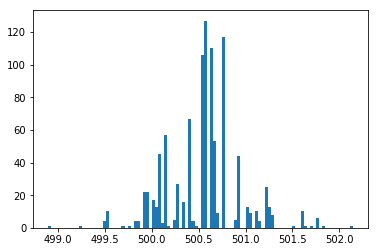

In [29]:
vTheta = samples[0]
plt.hist(vTheta[:,1],100)
plt.show()